<a href="https://colab.research.google.com/github/steffalonee/DE_1TSprint/blob/main/1T_Sprint_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score, roc_auc_score

In [6]:
df_train = pd.read_csv('data/train.csv', delimiter=',')


In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train = df_train.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [10]:
df_train = df_train[df_train['Embarked'].isna() == False]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


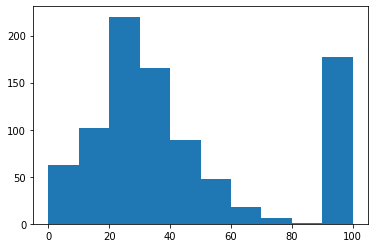

In [11]:
# заменим пустой возраст на 100 лет

df_train["Age"] = df_train["Age"].fillna(100)
df_train["Age"] = df_train['Age'].transform(lambda x: x.round()).astype('int16')
plt.hist(df_train['Age'])
plt.show()

In [12]:
df_train= df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    int16  
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(1), int16(1), int64(4), object(2)
memory usage: 50.0+ KB


In [13]:
col_cols = set(df_train.columns) - set(['Sex', 'Embarked'])

In [14]:
# кодирование категориальных

df_train = pd.get_dummies(df_train,drop_first=True)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [15]:
X = df_train.drop(columns = ['Survived'])
y = df_train['Survived']
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.20, random_state=111222, stratify=y)
numeric = set(col_cols) - set(['Survived'])
numeric = list(numeric)
numeric

['Parch', 'Age', 'Fare', 'Pclass', 'SibSp']

In [16]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_valid

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
151,-1.448638,-0.629231,0.471957,-0.499763,0.602676,0,0,1
100,0.893358,-0.412234,-0.513274,-0.499763,-0.510632,0,0,1
268,-1.448638,0.672747,-0.513274,0.682883,2.249997,0,0,1
538,0.893358,2.191720,-0.513274,-0.499763,-0.385386,1,0,1
263,-1.448638,0.021758,-0.513274,-0.499763,-0.660374,1,0,1
...,...,...,...,...,...,...,...,...
20,-0.277640,-0.159072,-0.513274,-0.499763,-0.167291,1,0,1
491,0.893358,-0.665397,-0.513274,-0.499763,-0.522880,1,0,1
307,-1.448638,-0.810061,0.471957,-0.499763,1.404883,0,0,0
206,0.893358,-0.267570,0.471957,-0.499763,-0.359783,1,0,1


In [ ]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

In [18]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = lr.predict(X)
  
  print(f'MSE {label}={mean_squared_error(y, pred):.2f}')
  print(f'MAE {label}={mean_absolute_error(y, pred):.2f}')
  print(f'R2 {label}={r2_score(y, pred):.2f}')  
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1_score(y, pred):.3f}')     
  print(f'ROC_AUC {label}={roc_auc_score(y, lr.predict_proba(X)[:, 1]):.3f}\n')   

MSE train=0.21
MAE train=0.21
R2 train=0.14
Acc train=0.792
F1 train=0.731
ROC_AUC train=0.837

MSE test=0.23
MAE test=0.23
R2 test=0.04
Acc test=0.768
F1 test=0.700
ROC_AUC test=0.817



In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = knn.predict(X)

  print(f'MSE {label}={mean_squared_error(y, pred):.2f}')
  print(f'MAE {label}={mean_absolute_error(y, pred):.2f}')
  print(f'R2 {label}={r2_score(y, pred):.2f}')  
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')
  print(f'F1 {label}={f1_score(y, pred):.3f}')  
  print(f'ROC_AUC {label}={roc_auc_score(y, knn.predict_proba(X)[:, 1]):.3f}\n') 

MSE train=0.17
MAE train=0.17
R2 train=0.31
Acc train=0.832
F1 train=0.785
ROC_AUC train=0.903

MSE test=0.26
MAE test=0.26
R2 test=-0.09
Acc test=0.735
F1 test=0.677
ROC_AUC test=0.803



In [21]:
random_state = 1
params = dict(
    C = [100, 10, 1, 0.1, 0.01, 0.001],
    penalty=['l1', 'l2', 'elasticnet'],
    solver=['saga'],
    multi_class =['auto', 'ovr', 'multinomial'],
    l1_ratio=[1]
)

In [22]:
lr = LogisticRegression()
cv = RandomizedSearchCV(lr, params, n_jobs=-1, cv=5, random_state=random_state)
cv.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                                        'l1_ratio': [1],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga']},
                   random_state=1)

In [23]:
best_params = cv.best_params_
best_params

{'solver': 'saga',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'l1_ratio': 1,
 'C': 0.1}

In [24]:
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(C=0.1, l1_ratio=1, multi_class='ovr', solver='saga')

In [25]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = lr.predict(X)
  
  print(f'MSE {label}={mean_squared_error(y, pred):.2f}')
  print(f'MAE {label}={mean_absolute_error(y, pred):.2f}')
  print(f'R2 {label}={r2_score(y, pred):.2f}')  
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1_score(y, pred):.3f}')     
  print(f'ROC_AUC {label}={roc_auc_score(y, lr.predict_proba(X)[:, 1]):.3f}\n')  

MSE train=0.21
MAE train=0.21
R2 train=0.13
Acc train=0.789
F1 train=0.724
ROC_AUC train=0.836

MSE test=0.25
MAE test=0.25
R2 test=-0.01
Acc test=0.755
F1 test=0.667
ROC_AUC test=0.820



In [26]:
params = dict(
    n_neighbors = range(1, 40),
    weights = ['uniform', 'distance'],
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
    p=[1, 2]
)
knn = KNeighborsClassifier()
cv = RandomizedSearchCV(knn, params, n_jobs=-1, cv=5, random_state=random_state)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 40),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=1)

In [ ]:
best_params = cv.best_params_
best_params

In [28]:
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=13)

In [29]:
for X, y, label in zip([X_train, X_valid], [y_train, y_valid], ['train', 'test']):
  pred = knn.predict(X)
  
  print(f'MSE {label}={mean_squared_error(y, pred):.2f}')
  print(f'MAE {label}={mean_absolute_error(y, pred):.2f}')
  print(f'R2 {label}={r2_score(y, pred):.2f}')  
  
  print(f'Acc {label}={accuracy_score(y, pred):.3f}')  
  print(f'F1 {label}={f1_score(y, pred):.3f}')     
  print(f'ROC_AUC {label}={roc_auc_score(y, knn.predict_proba(X)[:, 1]):.3f}\n')  

MSE train=0.19
MAE train=0.19
R2 train=0.21
Acc train=0.810
F1 train=0.751
ROC_AUC train=0.869

MSE test=0.24
MAE test=0.24
R2 test=0.02
Acc test=0.761
F1 test=0.684
ROC_AUC test=0.814

